In [1]:
! pip install -q kaggle

from google.colab import files

files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d uciml/sms-spam-collection-dataset

! unzip sms-spam-collection-dataset

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 88.0MB/s]
Archive:  sms-spam-collection-dataset.zip
  inflating: spam.csv                


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
movies = pd.read_csv('/content/spam.csv')

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

In [4]:
import chardet
#  Read the file in binary mode to detect encoding
with open('/content/spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'Windows-1252', 'confidence': 0.7269493857068697, 'language': ''}


In [5]:
sms = pd.read_csv('/content/spam.csv', encoding='Windows-1252')


In [6]:
sms

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


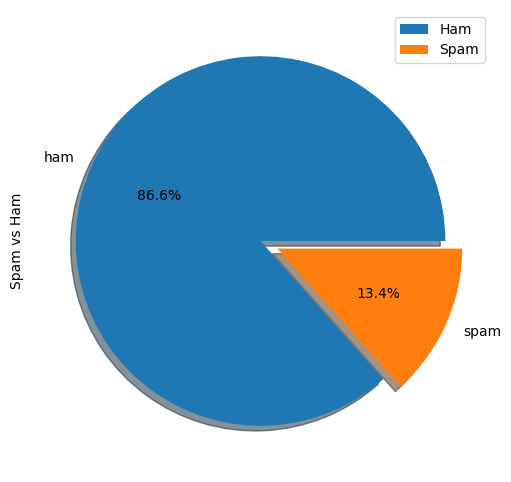

In [7]:
sms["v1"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [8]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
sms.rename(columns={'v1': 'Label', 'v2': 'Message'}, inplace=True)
sms.head()


,Label,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Data cleaning**

In [10]:
import re
import nltk

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import  word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [12]:
corpus=[]
for i in range(0,len(sms)):
    review=re.sub('[^a-zA-z]',' ',sms['Message'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [13]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [14]:
## Create the Bag OF Words model
from sklearn.feature_extraction.text import CountVectorizer
## for Binary BOW enable binary=True
cv_bow=CountVectorizer(max_features=100,binary=True)

X=cv_bow.fit_transform(corpus).toarray()

np.set_printoptions(edgeitems=30, linewidth=100000,
    formatter=dict(float=lambda x: "%.3g" % x))

print(X[0:2])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [23]:
cv_bow.vocabulary_

{'go': 23,
 'great': 27,
 'got': 26,
 'wat': 90,
 'ok': 59,
 'free': 19,
 'win': 94,
 'text': 79,
 'txt': 86,
 'say': 70,
 'already': 0,
 'think': 82,
 'life': 39,
 'hey': 30,
 'week': 92,
 'back': 5,
 'like': 40,
 'still': 75,
 'send': 72,
 'friend': 20,
 'prize': 65,
 'claim': 9,
 'call': 6,
 'mobile': 50,
 'co': 10,
 'home': 32,
 'want': 89,
 'today': 84,
 'cash': 8,
 'day': 15,
 'reply': 67,
 'www': 96,
 'right': 68,
 'take': 77,
 'time': 83,
 'message': 47,
 'com': 11,
 'oh': 58,
 'yes': 99,
 'make': 45,
 'way': 91,
 'dont': 17,
 'miss': 49,
 'ur': 88,
 'going': 24,
 'da': 14,
 'lor': 42,
 'meet': 46,
 'really': 66,
 'know': 35,
 'lol': 41,
 'love': 43,
 'let': 38,
 'work': 95,
 'yeah': 97,
 'tell': 78,
 'anything': 2,
 'thanks': 80,
 'uk': 87,
 'please': 63,
 'msg': 52,
 'see': 71,
 'pls': 64,
 'need': 54,
 'tomorrow': 85,
 'hope': 33,
 'well': 93,
 'lt': 44,
 'gt': 28,
 'get': 21,
 'ask': 3,
 'morning': 51,
 'happy': 29,
 'sorry': 74,
 'give': 22,
 'new': 55,
 'find': 18,
 'year

**N Gram**

In [16]:
cv_ngram=CountVectorizer(max_features=500,binary=True,ngram_range=(2,3))

X=cv_ngram.fit_transform(corpus).toarray()

np.set_printoptions(edgeitems=30, linewidth=100000,
    formatter=dict(float=lambda x: "%.3g" % x))

print(X[0:2])


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [17]:
cv_ngram.vocabulary_

{'free entry': 134,
 'rate apply': 342,
 'claim call': 61,
 'call claim': 26,
 'claim code': 62,
 'call claim code': 27,
 'update latest': 438,
 'latest colour': 216,
 'free call': 130,
 'call mobile': 38,
 'free call mobile': 131,
 'chance win': 59,
 'win cash': 483,
 'chance win cash': 60,
 'txt word': 431,
 'dont miss': 105,
 'let know': 221,
 'feel like': 125,
 'go home': 152,
 'anything lor': 5,
 'call reply': 44,
 'nokia mobile': 289,
 'mobile free': 264,
 'free camcorder': 132,
 'please call': 317,
 'delivery tomorrow': 101,
 'lt gt': 240,
 'missed call': 261,
 'want go': 471,
 'first time': 129,
 'like lt': 224,
 'like lt gt': 225,
 'sm ac': 378,
 'bx ip': 23,
 'sorry call': 382,
 'call later': 36,
 'later meeting': 213,
 'sorry call later': 383,
 'awarded bonus': 14,
 'prize call': 335,
 'ur awarded': 439,
 'call free': 30,
 'thats cool': 413,
 'hi hi': 186,
 'call customer': 28,
 'customer service': 90,
 'service representative': 367,
 'guaranteed cash': 172,
 'cash prize': 5

**TF - IDF**

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv_tf_idf = TfidfVectorizer(max_features=500,binary=True, ngram_range=(1,2))
X = cv_tf_idf.fit_transform(corpus).toarray()
np.set_printoptions(edgeitems=30, linewidth=100000,
    formatter=dict(float=lambda x: "%.3g" % x))


In [19]:
cv_tf_idf.vocabulary_

{'go': 152,
 'point': 330,
 'great': 162,
 'world': 483,
 'got': 160,
 'wat': 462,
 'ok': 296,
 'lar': 210,
 'wif': 473,
 'free': 139,
 'entry': 122,
 'win': 475,
 'st': 397,
 'may': 249,
 'text': 412,
 'receive': 349,
 'question': 342,
 'txt': 446,
 'rate': 344,
 'apply': 18,
 'dun': 112,
 'say': 364,
 'early': 114,
 'already': 9,
 'think': 419,
 'life': 225,
 'around': 20,
 'though': 422,
 'hey': 183,
 'week': 466,
 'word': 480,
 'back': 31,
 'like': 226,
 'fun': 145,
 'still': 401,
 'xxx': 490,
 'send': 371,
 'even': 123,
 'brother': 46,
 'speak': 395,
 'per': 311,
 'set': 375,
 'friend': 141,
 'network': 279,
 'customer': 87,
 'selected': 370,
 'prize': 336,
 'claim': 68,
 'call': 51,
 'code': 73,
 'valid': 451,
 'hour': 190,
 'mobile': 262,
 'month': 265,
 'latest': 215,
 'colour': 76,
 'camera': 57,
 'co': 71,
 'free call': 140,
 'gonna': 156,
 'home': 187,
 'soon': 391,
 'want': 460,
 'talk': 409,
 'stuff': 404,
 'tonight': 434,
 'enough': 121,
 'today': 428,
 'chance': 62,
 'ca

In [20]:
X

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.48, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0.66, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.334, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0.285, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.467, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.476, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [

**Using Naive Bayes classifier**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

y=sms['Label']

# Assuming X is your feature matrix and y is your target labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier
clf = MultinomialNB()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.967713004484305


**Using SVM classifier**

In [26]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_model = SVC(kernel='linear')  # You can experiment with different kernels (linear, polynomial, RBF)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.97847533632287
